In [1]:
# From Python
# It requires OpenCV installed for Python

from IPython.display import clear_output, Image, display, HTML
import time

import matplotlib.pyplot as plt
import numpy as np

import sys
import cv2
import os
from sys import platform
import argparse
import time

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)


/openpose/build/examples/tutorial_api_python


In [2]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

In [3]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e

# Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000241.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
params["hand"] = True
params["hand_detector"] = 2
params["body"] = 0

# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item

# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()



In [4]:
# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Read image and face rectangle locations
imageToProcess = cv2.imread(args[0].image_path)
handRectangles = [
    # Left/Right hands person 0
    [
    op.Rectangle(320.035889, 377.675049, 69.300949, 69.300949),
    op.Rectangle(0., 0., 0., 0.),
    ],
    # Left/Right hands person 1
    [
    op.Rectangle(80.155792, 407.673492, 80.812706, 80.812706),
    op.Rectangle(46.449715, 404.559753, 98.898178, 98.898178),
    ],
    # Left/Right hands person 2
    [
    op.Rectangle(185.692673, 303.112244, 157.587555, 157.587555),
    op.Rectangle(88.984360, 268.866547, 117.818230, 117.818230),
    ]
]



Left hand keypoints: 
[[[3.59770966e+02 4.11572266e+02 3.73738468e-01]
  [3.55627960e+02 4.09500763e+02 6.02875054e-01]
  [3.50920013e+02 4.09877380e+02 7.37030029e-01]
  [3.45458801e+02 4.13078796e+02 7.71889210e-01]
  [3.42069092e+02 4.16468506e+02 8.10055971e-01]
  [3.49413483e+02 4.17410095e+02 7.56896138e-01]
  [3.43387299e+02 4.20611511e+02 8.16000700e-01]
  [3.38679382e+02 4.22871307e+02 7.15209782e-01]
  [3.34536377e+02 4.24942810e+02 6.93874657e-01]
  [3.49036835e+02 4.18728333e+02 5.49625337e-01]
  [3.43010681e+02 4.22118042e+02 6.62676692e-01]
  [3.37361145e+02 4.24377869e+02 6.53851867e-01]
  [3.32653198e+02 4.26637665e+02 4.61140335e-01]
  [3.49036835e+02 4.18351685e+02 4.89064783e-01]
  [3.43575623e+02 4.21364777e+02 5.61607838e-01]
  [3.38679382e+02 4.23436279e+02 5.89932740e-01]
  [3.34913025e+02 4.25131134e+02 5.39615273e-01]
  [3.49036835e+02 4.17975067e+02 3.03234041e-01]
  [3.43763947e+02 4.20423187e+02 5.51327646e-01]
  [3.40562531e+02 4.21741425e+02 4.65440184e-01

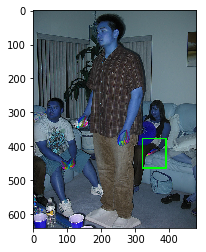

In [5]:
# Create new datum
datum = op.Datum()
datum.cvInputData = imageToProcess
datum.handRectangles = handRectangles

# Process and display image
opWrapper.emplaceAndPop([datum])
print("Left hand keypoints: \n" + str(datum.handKeypoints[0]))
print("Right hand keypoints: \n" + str(datum.handKeypoints[1]))

datum.cvOutputData = cv2.rectangle(datum.cvOutputData,(320,377),(389,464),(0,255,0),3)

plt.imshow(datum.cvOutputData)
plt.show()
# img = arrayShow(datum.cvOutputData)
# display(img)

# cv2.imshow("OpenPose 1.4.0 - Tutorial Python API", datum.cvOutputData)
# cv2.waitKey(0)
